# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [66]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:",'\n',xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n') #calling as a method: dangerous
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: 
 a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [68]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n up to three')
print (xs[7:], '\n from seventh')
print (xs[::3], '\n step of three')
print (xs[xs>3], '\n grater than three')
print (np.exp(xs), '\n exp')
print (np.mean(xs), np.std(xs), '\n mean and devstd')

a    0.0
b    0.5
c    1.0
dtype: float64 
 up to three
h    3.5
i    4.0
j    4.5
dtype: float64 
 from seventh
a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 
 step of three
h    3.5
i    4.0
j    4.5
dtype: float64 
 grater than three
a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 
 exp
2.25 1.4361406616345072 
 mean and devstd


In [69]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d) #ok.. series == dictionary in pracice...

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s) #we get NaN!! ocho..

a    0.584689
b   -2.169868
c   -0.673682
d    0.026733
e   -0.011853
dtype: float64
a         NaN
b   -4.339736
c   -1.347364
d    0.053466
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-09
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [73]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
print(ts.value) #actual timestamp
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [76]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-09-13'], '\n') # Note - includes end time


2020-09-11 14:45:00    10.301826
2020-09-12 14:45:00    11.514436
2020-09-13 14:45:00     9.443940
2020-09-14 14:45:00    10.327565
Freq: D, dtype: float64 

2020-09-11 14:45:00    10.301826
2020-09-12 14:45:00    11.514436
2020-09-13 14:45:00     9.443940
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [83]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2020-11-09 14:45:00,1.134209,-0.631773,-0.831884,-1.595457
2020-11-09 15:45:00,-0.760208,-0.254055,2.597034,0.388139
2020-11-09 16:45:00,0.508648,1.056878,-0.669158,1.888361
2020-11-09 17:45:00,1.830660,-2.689074,1.911188,-0.830915
2020-11-09 18:45:00,-1.734418,-0.864573,-0.460388,-1.419375
2020-11-09 19:45:00,1.305891,-1.157905,0.610049,-2.176608
2020-11-09 20:45:00,0.061454,0.212296,-0.160654,0.401392
2020-11-09 21:45:00,0.296402,-0.014575,-0.281596,0.978372
2020-11-09 22:45:00,1.907973,1.743573,-0.520402,-0.862621
2020-11-09 23:45:00,-0.456774,1.706971,-0.902770,-0.380967


or by means of a dictionary:


In [85]:
df2 = pd.DataFrame(
    { 'A' : 1., #if just one element, it's going to be repeated over and over..
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11), #pay attention to array lenghts and indexes!
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head() #just first records

,A,B,C,D
2020-11-09 14:45:00,-0.762218,0.115785,2.991449,0.345207
2020-11-09 15:45:00,-0.461811,0.712724,0.101122,-0.695622
2020-11-09 16:45:00,1.662150,-0.732070,-0.113994,-0.413618
2020-11-09 17:45:00,0.368244,-0.421824,0.600260,-0.040204
2020-11-09 18:45:00,1.697139,-0.782511,-2.008517,-0.008988


In [13]:
df.tail(4) #last records

,A,B,C,D
2020-11-09 20:45:00,-0.853281,-1.042549,-1.980586,0.168377
2020-11-09 21:45:00,-0.459920,0.433525,0.240113,-2.288564
2020-11-09 22:45:00,-0.303171,-0.182041,0.525951,-1.155489
2020-11-09 23:45:00,-0.282004,-0.087551,-1.493189,0.362743


In [14]:
df.index  

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values #it's a numpy array!!!

array([[-0.76221798,  0.11578486,  2.99144898,  0.3452072 ],
       [-0.46181122,  0.71272363,  0.1011219 , -0.69562169],
       [ 1.66215036, -0.73206968, -0.11399397, -0.41361805],
       [ 0.36824351, -0.42182362,  0.60026005, -0.04020435],
       [ 1.69713917, -0.78251106, -2.00851689, -0.00898783],
       [-0.81608016, -0.89897824,  1.1902264 ,  1.73612021],
       [-0.85328142, -1.04254915, -1.98058581,  0.16837651],
       [-0.45992022,  0.43352504,  0.2401128 , -2.28856364],
       [-0.30317128, -0.18204095,  0.52595107, -1.15548925],
       [-0.28200372, -0.08755082, -1.49318944,  0.36274336]])

In [87]:
df.describe() #nice!

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.409384,-0.089224,0.129142,-0.360968
std,1.176276,1.367052,1.208548,1.265320
min,-1.734418,-2.689074,-0.902770,-2.176608
25%,-0.327217,-0.806373,-0.631969,-1.280187
50%,0.402525,-0.134315,-0.370992,-0.605941
75%,1.262970,0.845733,0.417373,0.398079
max,1.907973,1.743573,2.597034,1.888361


In [18]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,-0.762218,-0.461811,1.662150,0.368244,1.697139,-0.816080,-0.853281,-0.459920,-0.303171,-0.282004
B,0.115785,0.712724,-0.732070,-0.421824,-0.782511,-0.898978,-1.042549,0.433525,-0.182041,-0.087551
C,2.991449,0.101122,-0.113994,0.600260,-2.008517,1.190226,-1.980586,0.240113,0.525951,-1.493189
D,0.345207,-0.695622,-0.413618,-0.040204,-0.008988,1.736120,0.168377,-2.288564,-1.155489,0.362743


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,0.345207,2.991449,0.115785,-0.762218
2020-11-09 15:45:00,-0.695622,0.101122,0.712724,-0.461811
2020-11-09 16:45:00,-0.413618,-0.113994,-0.732070,1.662150
2020-11-09 17:45:00,-0.040204,0.600260,-0.421824,0.368244
2020-11-09 18:45:00,-0.008988,-2.008517,-0.782511,1.697139
2020-11-09 19:45:00,1.736120,1.190226,-0.898978,-0.816080
2020-11-09 20:45:00,0.168377,-1.980586,-1.042549,-0.853281
2020-11-09 21:45:00,-2.288564,0.240113,0.433525,-0.459920
2020-11-09 22:45:00,-1.155489,0.525951,-0.182041,-0.303171
2020-11-09 23:45:00,0.362743,-1.493189,-0.087551,-0.282004


In [20]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 18:45:00,1.697139,-0.782511,-2.008517,-0.008988
2020-11-09 20:45:00,-0.853281,-1.042549,-1.980586,0.168377
2020-11-09 23:45:00,-0.282004,-0.087551,-1.493189,0.362743
2020-11-09 16:45:00,1.662150,-0.732070,-0.113994,-0.413618
2020-11-09 15:45:00,-0.461811,0.712724,0.101122,-0.695622
2020-11-09 21:45:00,-0.459920,0.433525,0.240113,-2.288564
2020-11-09 22:45:00,-0.303171,-0.182041,0.525951,-1.155489
2020-11-09 17:45:00,0.368244,-0.421824,0.600260,-0.040204
2020-11-09 19:45:00,-0.816080,-0.898978,1.190226,1.736120
2020-11-09 14:45:00,-0.762218,0.115785,2.991449,0.345207


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [89]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)


2020-11-09 14:45:00    1.134209
2020-11-09 15:45:00   -0.760208
2020-11-09 16:45:00    0.508648
2020-11-09 17:45:00    1.830660
2020-11-09 18:45:00   -1.734418
2020-11-09 19:45:00    1.305891
2020-11-09 20:45:00    0.061454
2020-11-09 21:45:00    0.296402
2020-11-09 22:45:00    1.907973
2020-11-09 23:45:00   -0.456774
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    1.134209
2020-11-09 15:45:00   -0.760208
2020-11-09 16:45:00    0.508648
2020-11-09 17:45:00    1.830660
2020-11-09 18:45:00   -1.734418
2020-11-09 19:45:00    1.305891
2020-11-09 20:45:00    0.061454
2020-11-09 21:45:00    0.296402
2020-11-09 22:45:00    1.907973
2020-11-09 23:45:00   -0.456774
Freq: H, Name: A, dtype: float64


In [90]:
# selecting rows by counting
print (df[0:3], '\n')

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00  1.134209 -0.631773 -0.831884 -1.595457
2020-11-09 15:45:00 -0.760208 -0.254055  2.597034  0.388139
2020-11-09 16:45:00  0.508648  1.056878 -0.669158  1.888361 

                            A         B         C         D
2020-11-09 14:45:00  1.134209 -0.631773 -0.831884 -1.595457
2020-11-09 15:45:00 -0.760208 -0.254055  2.597034  0.388139
2020-11-09 16:45:00  0.508648  1.056878 -0.669158  1.888361


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.762218
B    0.115785
C    2.991449
D    0.345207
Name: 2020-11-09 14:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
# a=df.loc[:,['A', 'B']] it returns a COPY! If you change a, then 
# df, the original database, is NOT changed!

,A,B
2020-11-09 14:45:00,-0.762218,0.115785
2020-11-09 15:45:00,-0.461811,0.712724
2020-11-09 16:45:00,1.662150,-0.732070
2020-11-09 17:45:00,0.368244,-0.421824
2020-11-09 18:45:00,1.697139,-0.782511
2020-11-09 19:45:00,-0.816080,-0.898978
2020-11-09 20:45:00,-0.853281,-1.042549
2020-11-09 21:45:00,-0.459920,0.433525
2020-11-09 22:45:00,-0.303171,-0.182041
2020-11-09 23:45:00,-0.282004,-0.087551


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,1.697139,-0.782511
2020-11-09 19:45:00,-0.816080,-0.898978
2020-11-09 20:45:00,-0.853281,-1.042549


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.4618112167251489
-0.4618112167251489


### Selecting by position

**ILOC RETURNS VIEWS** , different from LOC:

**LOC RETURNS COPIES**

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.368244
B   -0.421824
C    0.600260
D   -0.040204
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  0.368244 -0.421824
2020-11-09 18:45:00  1.697139 -0.782511


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]] #just counting across rows

,A,C
2020-11-09 15:45:00,-0.461811,0.101122
2020-11-09 16:45:00,1.662150,-0.113994
2020-11-09 18:45:00,1.697139,-2.008517


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00 -0.461811  0.712724  0.101122 -0.695622
2020-11-09 16:45:00  1.662150 -0.732070 -0.113994 -0.413618 

                            B         C
2020-11-09 14:45:00  0.115785  2.991449
2020-11-09 15:45:00  0.712724  0.101122
2020-11-09 16:45:00 -0.732070 -0.113994
2020-11-09 17:45:00 -0.421824  0.600260
2020-11-09 18:45:00 -0.782511 -2.008517
2020-11-09 19:45:00 -0.898978  1.190226
2020-11-09 20:45:00 -1.042549 -1.980586
2020-11-09 21:45:00  0.433525  0.240113
2020-11-09 22:45:00 -0.182041  0.525951
2020-11-09 23:45:00 -0.087551 -1.493189


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.7127236326245455

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,-0.762218,0.115785,2.991449,0.345207
2020-11-09 15:45:00,-0.461811,0.712724,0.101122,-0.695622
2020-11-09 21:45:00,-0.459920,0.433525,0.240113,-2.288564


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,NaN,0.115785,2.991449,0.345207
2020-11-09 15:45:00,NaN,0.712724,0.101122,NaN
2020-11-09 16:45:00,1.662150,NaN,NaN,NaN
2020-11-09 17:45:00,0.368244,NaN,0.600260,NaN
2020-11-09 18:45:00,1.697139,NaN,NaN,NaN
2020-11-09 19:45:00,NaN,NaN,1.190226,1.736120
2020-11-09 20:45:00,NaN,NaN,NaN,0.168377
2020-11-09 21:45:00,NaN,0.433525,0.240113,NaN
2020-11-09 22:45:00,NaN,NaN,0.525951,NaN
2020-11-09 23:45:00,NaN,NaN,NaN,0.362743


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.115785,2.991449,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.461811,0.712724,0.101122,5,0.5,2,0.999962
2020-11-09 16:45:00,1.662150,-0.732070,-0.113994,5,1.0,4,0.999848
2020-11-09 17:45:00,0.368244,-0.421824,0.600260,5,1.5,6,0.999657
2020-11-09 18:45:00,1.697139,-0.782511,-2.008517,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.816080,-0.898978,1.190226,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.853281,-1.042549,-1.980586,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.459920,0.433525,0.240113,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.303171,-0.182041,0.525951,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.282004,-0.087551,-1.493189,5,4.5,18,0.996917


In [94]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D
2020-11-09 14:45:00,-1.134209,-0.631773,-0.831884,-1.595457
2020-11-09 15:45:00,-0.760208,-0.254055,-2.597034,-0.388139
2020-11-09 16:45:00,-0.508648,-1.056878,-0.669158,-1.888361
2020-11-09 17:45:00,-1.830660,-2.689074,-1.911188,-0.830915
2020-11-09 18:45:00,-1.734418,-0.864573,-0.460388,-1.419375
2020-11-09 19:45:00,-1.305891,-1.157905,-0.610049,-2.176608
2020-11-09 20:45:00,-0.061454,-0.212296,-0.160654,-0.401392
2020-11-09 21:45:00,-0.296402,-0.014575,-0.281596,-0.978372
2020-11-09 22:45:00,-1.907973,-1.743573,-0.520402,-0.862621
2020-11-09 23:45:00,-0.456774,-1.706971,-0.902770,-0.380967


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime']) #in a sense.. it is a copy!... ok

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,0.115785,2.991449,5,0.0,1.000000
2020-11-09 15:45:00,-0.461811,0.712724,0.101122,5,0.5,0.999962
2020-11-09 16:45:00,1.662150,-0.732070,-0.113994,5,1.0,0.999848
2020-11-09 17:45:00,0.368244,-0.421824,0.600260,5,1.5,0.999657
2020-11-09 18:45:00,1.697139,-0.782511,-2.008517,5,2.0,0.999391
2020-11-09 19:45:00,-0.816080,-0.898978,1.190226,5,2.5,0.999048
2020-11-09 20:45:00,-0.853281,-1.042549,-1.980586,5,3.0,0.998630
2020-11-09 21:45:00,-0.459920,0.433525,0.240113,5,3.5,0.998135
2020-11-09 22:45:00,-0.303171,-0.182041,0.525951,5,4.0,0.997564
2020-11-09 23:45:00,-0.282004,-0.087551,-1.493189,5,4.5,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.115785,2.991449,5,0.0,0,1.000000
2020-11-09 19:45:00,-0.816080,-0.898978,1.190226,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.853281,-1.042549,-1.980586,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.459920,0.433525,0.240113,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.303171,-0.182041,0.525951,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.282004,-0.087551,-1.493189,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.115785,2.991449,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.461811,0.712724,0.101122,5,0.5,2,0.999962
2020-11-09 16:45:00,1.662150,-0.732070,-0.113994,5,1.0,4,0.999848
2020-11-09 17:45:00,0.368244,-0.421824,0.600260,5,1.5,6,0.999657
2020-11-09 18:45:00,1.697139,-0.782511,-2.008517,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.816080,-0.898978,1.190226,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.853281,-1.042549,-1.980586,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.459920,0.433525,0.240113,5,3.5,14,0.998135
2020-11-09 23:45:00,-0.282004,-0.087551,-1.493189,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.115785,2.991449,5,NaN,NaN,1.000000
2020-11-09 15:45:00,NaN,0.712724,0.101122,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.662150,NaN,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.368244,NaN,0.600260,5,1.5,6.0,0.999657
2020-11-09 18:45:00,1.697139,NaN,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,NaN,1.190226,5,2.5,10.0,0.999048
2020-11-09 20:45:00,NaN,NaN,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,NaN,0.433525,0.240113,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,NaN,0.525951,5,4.0,16.0,0.997564
2020-11-09 23:45:00,NaN,NaN,NaN,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,False,False,True,True,False
2020-11-09 15:45:00,True,False,False,False,False,False,False
2020-11-09 16:45:00,False,True,True,False,False,False,False
2020-11-09 17:45:00,False,True,False,False,False,False,False
2020-11-09 18:45:00,False,True,True,False,False,False,False
2020-11-09 19:45:00,True,True,False,False,False,False,False
2020-11-09 20:45:00,True,True,True,False,False,False,False
2020-11-09 21:45:00,True,False,False,False,False,False,False
2020-11-09 22:45:00,True,True,False,False,False,False,False
2020-11-09 23:45:00,True,True,True,False,False,False,False


In [96]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.115785,2.991449,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.000000,0.712724,0.101122,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.662150,0.000000,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.368244,0.000000,0.600260,5,1.5,6.0,0.999657
2020-11-09 18:45:00,1.697139,0.000000,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.000000,1.190226,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.000000,0.000000,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.000000,0.433525,0.240113,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,0.000000,0.525951,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.000000,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad') #VERY dangerous...

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.115785,2.991449,5,NaN,NaN,1.000000
2020-11-09 15:45:00,NaN,0.712724,0.101122,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.662150,0.712724,0.101122,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.368244,0.712724,0.600260,5,1.5,6.0,0.999657
2020-11-09 18:45:00,1.697139,0.712724,0.600260,5,2.0,8.0,0.999391
2020-11-09 19:45:00,1.697139,0.712724,1.190226,5,2.5,10.0,0.999048
2020-11-09 20:45:00,1.697139,0.712724,1.190226,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.697139,0.433525,0.240113,5,3.5,14.0,0.998135
2020-11-09 22:45:00,1.697139,0.433525,0.525951,5,4.0,16.0,0.997564
2020-11-09 23:45:00,1.697139,0.433525,0.525951,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [100]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A   -0.999664
B   -1.033167
C   -0.894512
D   -1.092221
dtype: float64 

2020-11-09 14:45:00   -1.048331
2020-11-09 15:45:00   -0.999859
2020-11-09 16:45:00   -1.030761
2020-11-09 17:45:00   -1.815459
2020-11-09 18:45:00   -1.119689
2020-11-09 19:45:00   -1.312613
2020-11-09 20:45:00   -0.208949
2020-11-09 21:45:00   -0.392737
2020-11-09 22:45:00   -1.258642
2020-11-09 23:45:00   -0.861870
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum) #just a view!

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.115785,2.991449,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.461811,0.828508,3.092571,10,0.5,2,1.999962
2020-11-09 16:45:00,1.200339,0.096439,2.978577,15,1.5,6,2.999810
2020-11-09 17:45:00,1.568583,-0.325385,3.578837,20,3.0,12,3.999467
2020-11-09 18:45:00,3.265722,-1.107896,1.570320,25,5.0,20,4.998858
2020-11-09 19:45:00,2.449642,-2.006874,2.760546,30,7.5,30,5.997906
2020-11-09 20:45:00,1.596360,-3.049423,0.779961,35,10.5,42,6.996536
2020-11-09 21:45:00,1.136440,-2.615898,1.020073,40,14.0,56,7.994670
2020-11-09 22:45:00,0.833269,-2.797939,1.546025,45,18.0,72,8.992234
2020-11-09 23:45:00,0.551265,-2.885490,0.052835,50,22.5,90,9.989152


In [46]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.115785,2.991449,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.461811,0.712724,0.101122,5,0.5,2,0.999962
2020-11-09 16:45:00,1.662150,-0.732070,-0.113994,5,1.0,4,0.999848
2020-11-09 17:45:00,0.368244,-0.421824,0.600260,5,1.5,6,0.999657
2020-11-09 18:45:00,1.697139,-0.782511,-2.008517,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.816080,-0.898978,1.190226,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.853281,-1.042549,-1.980586,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.459920,0.433525,0.240113,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.303171,-0.182041,0.525951,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.282004,-0.087551,-1.493189,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min())

A           2.550421
B           1.755273
C           4.999966
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    0.115785
2020-11-09 15:45:00    0.250912
2020-11-09 16:45:00    0.930081
2020-11-09 17:45:00   -0.053580
2020-11-09 18:45:00    0.914628
2020-11-09 19:45:00   -1.715058
2020-11-09 20:45:00   -1.895831
2020-11-09 21:45:00   -0.026395
2020-11-09 22:45:00   -0.485212
2020-11-09 23:45:00   -0.369555
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [101]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [51]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [53]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.247213,2.150067,0.058175,1.763234
1,-1.074069,-0.175689,-0.530353,-0.457137
2,1.037749,-0.388706,-2.403688,2.012791
3,-0.463445,0.634223,-0.011369,0.964286
4,-1.609015,0.652130,0.654054,0.708681
5,-0.604077,-0.868114,-0.883418,-0.797693
6,-0.091227,1.279966,-0.080981,0.278819
7,0.520575,0.460816,0.521300,-0.552115
8,-2.532106,0.203333,-0.028162,-0.074362
9,1.293489,-1.105297,1.292664,1.079318


In [54]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.247213  2.150067  0.058175  1.763234
 1 -1.074069 -0.175689 -0.530353 -0.457137
 2  1.037749 -0.388706 -2.403688  2.012791,
           0         1         2         3
 3 -0.463445  0.634223 -0.011369  0.964286
 4 -1.609015  0.652130  0.654054  0.708681
 5 -0.604077 -0.868114 -0.883418 -0.797693
 6 -0.091227  1.279966 -0.080981  0.278819,
           0         1         2         3
 7  0.520575  0.460816  0.521300 -0.552115
 8 -2.532106  0.203333 -0.028162 -0.074362
 9  1.293489 -1.105297  1.292664  1.079318]

In [55]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.247213,2.150067,0.058175,1.763234
1,-1.074069,-0.175689,-0.530353,-0.457137
2,1.037749,-0.388706,-2.403688,2.012791
3,-0.463445,0.634223,-0.011369,0.964286
4,-1.609015,0.652130,0.654054,0.708681
5,-0.604077,-0.868114,-0.883418,-0.797693
6,-0.091227,1.279966,-0.080981,0.278819
7,0.520575,0.460816,0.521300,-0.552115
8,-2.532106,0.203333,-0.028162,-0.074362
9,1.293489,-1.105297,1.292664,1.079318


In [56]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,1.247213,2.150067,0.058175,1.763234
1,-1.074069,-0.175689,-0.530353,-0.457137
2,1.037749,-0.388706,-2.403688,2.012791
3,-0.463445,0.634223,-0.011369,0.964286
4,-1.609015,0.652130,0.654054,0.708681
5,-0.604077,-0.868114,-0.883418,-0.797693
6,-0.091227,1.279966,-0.080981,0.278819
7,0.520575,0.460816,0.521300,-0.552115
8,-2.532106,0.203333,-0.028162,-0.074362
9,1.293489,-1.105297,1.292664,1.079318


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [57]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [58]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.064799,-0.374995
1,bar,one,0.220888,-1.885587
2,foo,two,1.331339,-1.267154
3,bar,three,0.234232,0.905074
4,foo,two,1.510816,2.473616
5,bar,two,0.001982,1.523419
6,foo,one,0.292120,0.313033
7,foo,three,0.643729,0.107224


In [59]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.457101,0.542906
foo,3.842803,1.251724


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [60]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.860144
       two       0.115711
baz    one       0.151155
       two      -0.774698
foo    one       0.099786
       two      -2.727147
qux    one      -0.336113
       two       0.090733
dtype: float64


In [61]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.220888 -1.885587
    three  0.234232  0.905074
    two    0.001982  1.523419
foo one    0.356919 -0.061962
    three  0.643729  0.107224
    two    2.842155  1.206462

In [62]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.220888
            D   -1.885587
     three  C    0.234232
            D    0.905074
     two    C    0.001982
            D    1.523419
foo  one    C    0.356919
            D   -0.061962
     three  C    0.643729
            D    0.107224
     two    C    2.842155
            D    1.206462
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

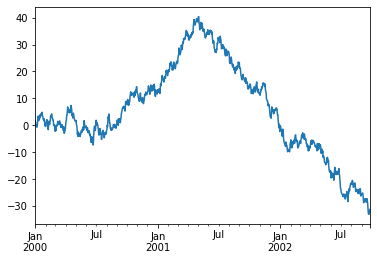

In [63]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

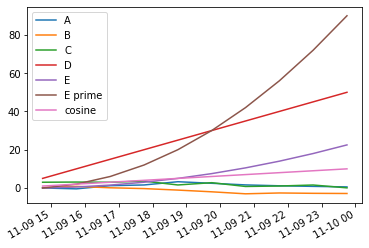

In [64]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')